In [2]:
import numpy as np
from PIL import Image
import cv2
import imutils
import matplotlib.pyplot as plt
%matplotlib inline

import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract'
# pytesseract.pytesseract.tesseract_cmd = r'D:\YEAR3 sem1\CSE3105 - Machine Learning and its Applications\project\code\Scripts\pytesseract.exe'

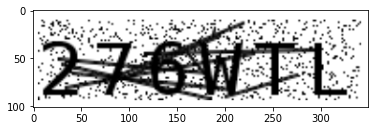

In [3]:
image_brg = cv2.imread('../images/captcha_images/vtop_captcha/276wtl.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image_brg, cmap='gray')

In [3]:
text = pytesseract.image_to_string('../images/captcha_images/vtop_captcha/276wtl.png', lang='eng', config='-c page_separator=""')
text

''

In [4]:
print(pytesseract.image_to_string(Image.open('../images/captcha_images/vtop_captcha/d5dhaq.png', 'r')))

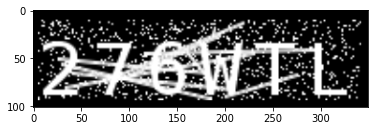

In [5]:
image_neg = cv2.bitwise_not(image_brg)
plt.imshow(image_neg, cmap='gray')

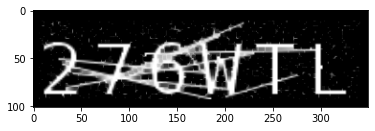

In [6]:
image_erd = cv2.erode(image_neg, np.ones(shape=(3, 3)), iterations=1)
plt.imshow(image_erd, cmap='gray')

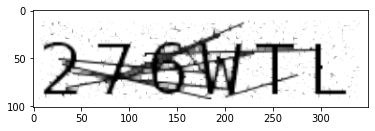

In [7]:
image_erd_neg = cv2.bitwise_not(image_erd)
plt.imshow(image_erd_neg, cmap='gray')

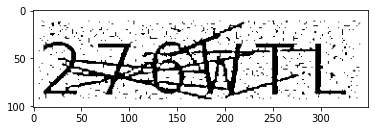

In [8]:
image_brg_threshold = cv2.adaptiveThreshold(image_erd_neg, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 12)
plt.imshow(image_brg_threshold, cmap='gray')

In [9]:
text = pytesseract.image_to_string(image_brg_threshold, lang='eng', config='-c page_separator=""')
text

''

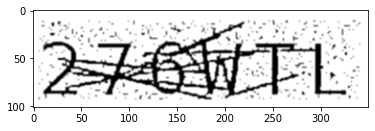

In [10]:
image_blur = cv2.GaussianBlur(image_brg_threshold, ksize=(3, 3), sigmaX=0)
plt.imshow(image_blur, cmap='gray')

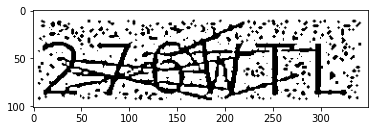

In [11]:
image_brg_threshold2 = cv2.adaptiveThreshold(image_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 12)
plt.imshow(image_brg_threshold2, cmap='gray')

In [12]:
text = pytesseract.image_to_string(image_brg_threshold2, lang='eng', config='-c page_separator=""')
text

''

In [13]:
chars = []
pts = []
for i, row in enumerate(image_brg_threshold):
    for j, pixel in enumerate(row):
        if pixel < 30:
            pts.append((i, j))
pts = np.array(pts)

In [14]:
from sklearn.cluster import kmeans_plusplus

In [15]:
centers, _ = kmeans_plusplus(pts, n_clusters=5, random_state=11)
print(centers)


[[ 46 117]
 [ 38 247]
 [ 33  58]
 [ 32 178]
 [ 86 207]]


In [16]:
x_c = centers[:, 0]
y_c = centers[:, 1]
x_p = pts[:, 0]
y_p = pts[:, 1]

In [17]:
print(x_c)

[46 38 33 32 86]


In [18]:
print(y_c)

[117 247  58 178 207]


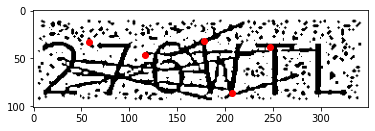

In [19]:
implot = plt.imshow(image_brg_threshold2, cmap='gray')
# plt.scatter(y_p, x_p,c='green')
plt.scatter(y_c, x_c,c='red')
plt.show()

[[  9  17]
 [324   9]
 [327  89]
 [ 11  97]]


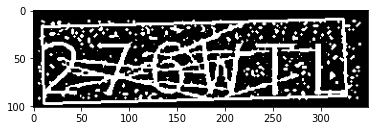

In [20]:
cnts = cv2.findContours(cv2.bitwise_not(image_brg_threshold2).copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

if len(cnts) == 0:
  print("No contours")

c = sorted(cnts,key=cv2.contourArea,reverse = True)[0]
rect = cv2.minAreaRect(c)
box = cv2.cv.Boxpoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
box = np.int0(box)

baranno = cv2.bitwise_not(image_brg_threshold2).copy()

cv2.line(baranno,box[0],box[1],[255, 0, 0],2)
cv2.line(baranno,box[1],box[2],[255, 0, 0],2)
cv2.line(baranno,box[2],box[3],[255, 0, 0],2)
cv2.line(baranno,box[3],box[0],[255, 0, 0],2)
print(box)

plt.imshow(baranno, cmap='gray')

In [21]:
tl =[]
br =[]
for i in range(len(x_c)):
    tl.append((y_c[i] - 30, x_c[i] - 30))
    br.append((y_c[i] + 30, x_c[i] + 30))

In [22]:
print(tl)

[(87, 16), (217, 8), (28, 3), (148, 2), (177, 56)]


In [23]:
print(br)

[(147, 76), (277, 68), (88, 63), (208, 62), (237, 116)]


In [24]:
image_temp = image_brg_threshold2.copy()

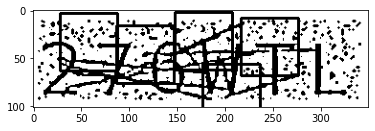

In [25]:
plt.imshow(image_temp, cmap='gray')
for i in range(len(x_c)):
    cv2.rectangle(image_temp, tl[i], br[i], (0, 0, 255), 2)
plt.imshow(image_temp, cmap='gray')